<a href="https://colab.research.google.com/github/JaeDoo1034/Kaggle-Study/blob/master/NIpa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [231]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [232]:
import tarfile

In [233]:
path = '/content/drive/My Drive/'

In [234]:
# ap = tarfile.open(path + 'NIPA_하반기 경진대회_사전검증.tar')
# ap.extractall(path + 'Input')

In [235]:
train_dir = path + 'Input/train'
test_dir = path + 'Input/test'

In [236]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, MaxPooling2D, BatchNormalization, concatenate, Input
from tensorflow.keras import Model
import os

In [237]:
import warnings
warnings.filterwarnings("ignore")

In [238]:
from PIL import Image # 이미지를 열 때 사용

In [239]:
train_dir

'/content/drive/My Drive/Input/train'

In [240]:
os.listdir(train_dir)

['10_20_1004.jpg',
 '10_20_1005.jpg',
 '10_20_1021.jpg',
 '10_20_1035.jpg',
 '10_20_1048.jpg',
 '10_20_1049.jpg',
 '10_20_105.jpg',
 '10_20_1051.jpg',
 '10_20_1054.jpg',
 '10_20_1059.jpg',
 '10_20_1064.jpg',
 '10_20_1066.jpg',
 '10_20_1069.jpg',
 '10_20_107.jpg',
 '10_20_1070.jpg',
 '10_20_1071.jpg',
 '10_20_1075.jpg',
 '10_20_109.jpg',
 '10_20_1094.jpg',
 '10_20_1095.jpg',
 '10_20_1097.jpg',
 '10_20_1098.jpg',
 '10_20_111.jpg',
 '10_20_1110.jpg',
 '10_20_1112.jpg',
 '10_20_1129.jpg',
 '10_20_1132.jpg',
 '10_20_1150.jpg',
 '10_20_1152.jpg',
 '10_20_1153.jpg',
 '10_20_116.jpg',
 '10_20_1160.jpg',
 '10_20_1161.jpg',
 '10_20_117.jpg',
 '10_20_1172.jpg',
 '10_20_1174.jpg',
 '10_20_1182.jpg',
 '10_20_1189.jpg',
 '10_20_1192.jpg',
 '10_20_12.jpg',
 '10_20_1216.jpg',
 '10_20_1218.jpg',
 '10_20_1222.jpg',
 '10_20_1224.jpg',
 '10_20_1228.jpg',
 '10_20_1233.jpg',
 '10_20_1234.jpg',
 '10_20_1238.jpg',
 '10_20_124.jpg',
 '10_20_1244.jpg',
 '10_20_1250.jpg',
 '10_20_1256.jpg',
 '10_20_1258.jpg',
 '

In [241]:
train_files = glob.glob(train_dir + '/*jpg')
len(train_files)

16000

In [242]:
train_files[1500]

'/content/drive/My Drive/Input/train/11_14_817.jpg'

이미지 사이즈 알기

In [243]:
img_1 = Image.open(train_files[0])

In [244]:
image = np.array(img_1)

In [245]:
image.shape

(256, 256, 3)

In [246]:
train_files[0]

'/content/drive/My Drive/Input/train/10_20_1004.jpg'

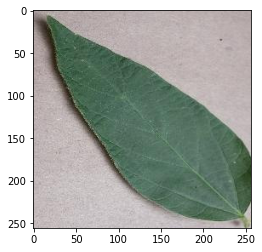

In [247]:
plt.imshow(image)
plt.show()

In [248]:
from keras.preprocessing.image import ImageDataGenerator

In [249]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [250]:
train_dir

'/content/drive/My Drive/Input/train'

In [251]:
train_files

['/content/drive/My Drive/Input/train/10_20_1004.jpg',
 '/content/drive/My Drive/Input/train/10_20_1005.jpg',
 '/content/drive/My Drive/Input/train/10_20_1021.jpg',
 '/content/drive/My Drive/Input/train/10_20_1035.jpg',
 '/content/drive/My Drive/Input/train/10_20_1048.jpg',
 '/content/drive/My Drive/Input/train/10_20_1049.jpg',
 '/content/drive/My Drive/Input/train/10_20_105.jpg',
 '/content/drive/My Drive/Input/train/10_20_1051.jpg',
 '/content/drive/My Drive/Input/train/10_20_1054.jpg',
 '/content/drive/My Drive/Input/train/10_20_1059.jpg',
 '/content/drive/My Drive/Input/train/10_20_1064.jpg',
 '/content/drive/My Drive/Input/train/10_20_1066.jpg',
 '/content/drive/My Drive/Input/train/10_20_1069.jpg',
 '/content/drive/My Drive/Input/train/10_20_107.jpg',
 '/content/drive/My Drive/Input/train/10_20_1070.jpg',
 '/content/drive/My Drive/Input/train/10_20_1071.jpg',
 '/content/drive/My Drive/Input/train/10_20_1075.jpg',
 '/content/drive/My Drive/Input/train/10_20_109.jpg',
 '/content/dr

In [252]:
def read_image(path):
  gfile = tf.io.read_file(path)
  image = tf.io.decode_image(gfile,dtype = tf.float64)
  return image

In [253]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [254]:
dataset = tf.data.Dataset.from_tensor_slices(train_files)

In [255]:
dataset = dataset.map(read_image,num_parallel_calls=AUTOTUNE)

In [256]:
tf_image = next(iter(dataset))

In [257]:
tf_image.shape

TensorShape([256, 256, 3])

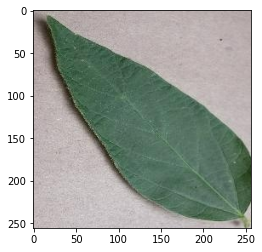

In [258]:
plt.imshow(tf_image)
plt.show()

In [259]:
os.path.basename(train_files[0]).replace('jpg','').split('_')

['10', '20', '1004.']

In [260]:
def get_plant(path):
  return os.path.basename(path).replace('jpg','').split('_')[0]

In [261]:
def get_disease(path):
  return os.path.basename(path).replace('jpg','').split('_')[1]

In [262]:
def get_index(path):
  return os.path.basename(path).replace('jpg','').split('_')[2]

In [263]:
plant_label = [get_plant(path) for path in train_files]

In [264]:
plant_disease = [get_disease(path) for path in train_files]

In [265]:
plant_index = [get_index(path) for path in train_files]

In [266]:
print(len(plant_label))
print(len(plant_disease))
print(len(plant_index))

16000
16000
16000


In [267]:
unique_plant_label = np.unique(plant_label,return_counts = True)
unique_disease_label = np.unique(plant_disease,return_counts = True)

In [268]:
unique_plant_label

(array(['10', '11', '13', '3', '4', '5', '7', '8'], dtype='<U2'),
 array([ 800,  800, 6400, 1600, 2400,  800, 1600, 1600]))

In [269]:
unique_disease_label

(array(['1', '11', '14', '15', '16', '17', '18', '2', '20', '5', '6', '7',
        '8', '9'], dtype='<U2'),
 array([1600,  800,  800,  800,  800,  800,  800,  800, 3200,  800, 1600,
         800,  800, 1600]))

In [270]:
data = {'path' : train_files,'plant' : plant_label, 'disease' : plant_disease,'index' : plant_index}

In [271]:
df = pd.DataFrame(data)

In [272]:
df['index'] = df['index'].str.replace('.','')

In [273]:
df = df.set_index('index')

In [274]:
df = df.reset_index()

In [275]:
val_df = df.sample(2000)

In [276]:
val_df

,index,path,plant,disease
9001,191,/content/drive/My Drive/Input/train/3_5_191.jpg,3,5
14295,800,/content/drive/My Drive/Input/train/7_20_800.jpg,7,20
6266,780,/content/drive/My Drive/Input/train/13_20_780.jpg,13,20
8445,524,/content/drive/My Drive/Input/train/3_20_524.jpg,3,20
14165,59,/content/drive/My Drive/Input/train/7_20_59.jpg,7,20
...,...,...,...,...
3908,863,/content/drive/My Drive/Input/train/13_17_863.jpg,13,17
8069,1082,/content/drive/My Drive/Input/train/3_20_1082.jpg,3,20
9035,235,/content/drive/My Drive/Input/train/3_5_235.jpg,3,5
2937,494,/content/drive/My Drive/Input/train/13_16_494.jpg,13,16


In [277]:
val_index = np.array(val_df.index)

In [278]:
total_index = np.array(df.index )

In [279]:
train_index = np.setdiff1d(total_index, val_index)

In [280]:
train_df = df.loc[train_index]

In [281]:
input_shape = (256,256,3)
dropout_rate = 0.3
num_class_plant = 8
num_class_disease = 14
batch_size = 40

In [282]:
train_datagen = ImageDataGenerator(
        rescale=1./255)

In [283]:
train_generator_plant = train_datagen.flow_from_dataframe(
        train_df,
        x_col='path',
        y_col='plant',
        target_size=(256,256),
        batch_size=batch_size
)

valid_generator_plant = train_datagen.flow_from_dataframe(
        val_df,
        x_col='path',
        y_col='plant',
        target_size=(256,256),
        batch_size=batch_size
)

Found 14000 validated image filenames belonging to 8 classes.
Found 2000 validated image filenames belonging to 8 classes.


In [284]:
train_generator_disease = train_datagen.flow_from_dataframe(
        train_df,
        x_col='path',
        y_col='disease',
        target_size=(256,256),
        batch_size=batch_size
)

valid_generator_disease = train_datagen.flow_from_dataframe(
        val_df,
        x_col='path',
        y_col='disease',
        target_size=(256,256),
        batch_size=batch_size
)

Found 14000 validated image filenames belonging to 14 classes.
Found 2000 validated image filenames belonging to 14 classes.


In [286]:
# 다중 출력을 위해 구조 짜는 중.. AutoEncoder만들까 고민중
inputs = tf.keras.layers.Input(input_shape)
net = tf.keras.layers.Conv2D(64, (3, 3), padding='SAME',activation  ='relu')(inputs)
net = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(net)
net = tf.keras.layers.Dropout(dropout_rate)(net)

net = tf.keras.layers.Conv2D(64, (3, 3), padding='SAME',activation  = 'relu')(net)
net = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(net)
net = tf.keras.layers.Dropout(dropout_rate)(net)

net = tf.keras.layers.Flatten()(net)
net = tf.keras.layers.Dense(64,activation = 'relu')(net)
net = tf.keras.layers.Dropout(dropout_rate)(net)
net = tf.keras.layers.Dense(num_class_plant,activation = 'softmax')(net)

model_plant = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

In [287]:
inputs = tf.keras.layers.Input(input_shape)
net = tf.keras.layers.Conv2D(64, (3, 3), padding='SAME',activation  ='relu')(inputs)
net = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(net)
net = tf.keras.layers.Dropout(dropout_rate)(net)

net = tf.keras.layers.Conv2D(64, (3, 3), padding='SAME',activation  = 'relu')(net)
net = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(net)
net = tf.keras.layers.Dropout(dropout_rate)(net)

net = tf.keras.layers.Flatten()(net)
net = tf.keras.layers.Dense(64,activation = 'relu')(net)
net = tf.keras.layers.Dropout(dropout_rate)(net)
net = tf.keras.layers.Dense(num_class_disease,activation = 'softmax')(net)

model_disease = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

In [288]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping, LearningRateScheduler

In [289]:
train_files[0]

'/content/drive/My Drive/Input/train/10_20_1004.jpg'

In [290]:
# 그냥 파일 하나로 쓰자 - 수정 예정
checkpoint_path_plant = '/content/drive/My Drive/Input/model0.h5' 
checkpoint_path_disease = '/content/drive/My Drive/Input/model1.h5'

In [291]:
cb_check_plant = ModelCheckpoint(checkpoint_path_plant,monitor='val_loss',verbose = 1,save_best_only = True,save_weights_only = True, mode ='auto')
reduce_lr_loss_plant = ReduceLROnPlateau(monitor= 'val_loss',factor = 0.2,min_lr = 1e-7,verbose = 1, mode = 'auto')
early_plant = EarlyStopping(monitor = 'val_loss',mode = 'min',restore_best_weights=True, patience = 3, verbose = 1)

In [292]:
cb_check_disease = ModelCheckpoint(checkpoint_path_disease,monitor='val_loss',verbose = 1,save_best_only = True,save_weights_only = True, mode ='auto')
reduce_lr_loss_disease = ReduceLROnPlateau(monitor= 'val_loss',factor = 0.2,min_lr = 1e-7,verbose = 1, mode = 'auto')
early_disease = EarlyStopping(monitor = 'val_loss',mode = 'min',restore_best_weights=True, patience = 3, verbose = 1)

In [293]:
# 참고 : https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [294]:
model_plant.compile(optimizer=tf.keras.optimizers.Adam(lr = 1e-3),  # Optimization
              loss='categorical_crossentropy',  # Loss Function 
              metrics=[recall_m,precision_m,f1_m])

In [295]:
model_disease.compile(optimizer=tf.keras.optimizers.Adam(lr = 1e-3),  # Optimization
              loss='categorical_crossentropy',  # Loss Function 
              metrics=[recall_m,precision_m,f1_m])

In [ ]:
# !pip install tensor-dash

In [ ]:
# from tensordash.tensordash import Tensordash

In [296]:
history_plant =   model_plant.fit_generator(
        train_generator_plant,
        # steps_per_epoch=40,
        epochs=30,
        validation_data=valid_generator_plant,
        #validation_steps=40,
        callbacks = [reduce_lr_loss_plant,cb_check_plant,early_plant]
        )

Epoch 1/30
350/350 [==============================] - ETA: 0s - loss: 1.1745 - recall_m: 0.4829 - precision_m: 0.7515 - f1_m: 0.5752
Epoch 00001: val_loss improved from inf to 0.56082, saving model to /content/drive/My Drive/Input/model0.h5
350/350 [==============================] - 60s 172ms/step - loss: 1.1745 - recall_m: 0.4829 - precision_m: 0.7515 - f1_m: 0.5752 - val_loss: 0.5608 - val_recall_m: 0.7240 - val_precision_m: 0.8722 - val_f1_m: 0.7904
Epoch 2/30
350/350 [==============================] - ETA: 0s - loss: 0.5825 - recall_m: 0.7254 - precision_m: 0.8657 - f1_m: 0.7877
Epoch 00002: val_loss improved from 0.56082 to 0.37207, saving model to /content/drive/My Drive/Input/model0.h5
350/350 [==============================] - 61s 173ms/step - loss: 0.5825 - recall_m: 0.7254 - precision_m: 0.8657 - f1_m: 0.7877 - val_loss: 0.3721 - val_recall_m: 0.8350 - val_precision_m: 0.9019 - val_f1_m: 0.8667
Epoch 3/30
350/350 [==============================] - ETA: 0s - loss: 0.4339 - rec

In [298]:
history_disease =  model_disease.fit_generator(
        train_generator_disease,
        # steps_per_epoch=40,
        epochs=30,
        validation_data=valid_generator_disease,
        #validation_steps=40,
        callbacks = [reduce_lr_loss_disease,cb_check_disease,early_disease]
        )

Epoch 1/30
350/350 [==============================] - ETA: 0s - loss: 2.3188 - recall_m: 0.1127 - precision_m: 0.6742 - f1_m: 0.1831
Epoch 00001: val_loss improved from inf to 1.58055, saving model to /content/drive/My Drive/Input/model1.h5
350/350 [==============================] - 60s 171ms/step - loss: 2.3188 - recall_m: 0.1127 - precision_m: 0.6742 - f1_m: 0.1831 - val_loss: 1.5805 - val_recall_m: 0.2035 - val_precision_m: 0.8490 - val_f1_m: 0.3238
Epoch 2/30
350/350 [==============================] - ETA: 0s - loss: 1.4657 - recall_m: 0.2942 - precision_m: 0.7448 - f1_m: 0.4169
Epoch 00002: val_loss improved from 1.58055 to 1.12350, saving model to /content/drive/My Drive/Input/model1.h5
350/350 [==============================] - 61s 173ms/step - loss: 1.4657 - recall_m: 0.2942 - precision_m: 0.7448 - f1_m: 0.4169 - val_loss: 1.1235 - val_recall_m: 0.3590 - val_precision_m: 0.8768 - val_f1_m: 0.5069
Epoch 3/30
350/350 [==============================] - ETA: 0s - loss: 1.1942 - rec

In [299]:
model_plant.summary()

Model: "Basic_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 256, 256, 64)      1792      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 128, 128, 64)      0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_34 (Dropout)         (None, 64, 64, 64)        0 

In [300]:
model_disease.summary()

Model: "Basic_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 256, 256, 64)      1792      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 128, 128, 64)      0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 64, 64, 64)        0 

In [301]:
from tensorflow.keras.models import load_model

In [303]:
model_plant.predict_generator()

In [307]:
test_df  = pd.DataFrame()

In [308]:
test_files = glob.glob(test_dir+'/*jpg')

In [309]:
len(test_files)

3997

In [310]:
test_df['path'] = test_files

In [312]:
test_datagen = ImageDataGenerator(
        rescale=1./255)

In [314]:
test_generator_plant = test_datagen.flow_from_dataframe(
        test_df,
        x_col='path',
        target_size=(256,256),
        batch_size=batch_size,
        class_mode = None
)

Found 3997 validated image filenames.


In [315]:
pred_plant = model_plant.predict_generator(test_generator_plant,verbose = 1)

Instructions for updating:
Please use Model.predict, which supports generators.
100/100 [==============================] - 14s 141ms/step


In [385]:
pred_disease = model_disease.predict_generator(test_generator_plant,verbose = 1)

100/100 [==============================] - 13s 130ms/step


Label작업

In [386]:
pred_plant = np.argmax(pred_plant, axis=1)

AxisError: ignored

In [387]:
pred_disease = np.argmax(pred_disease,axis = 1)

In [318]:
pred_plant

array([2, 2, 2, ..., 2, 2, 2])

In [322]:
decode_label_p = {0:'10', 1: '11', 2: '13', 3: '3', 4: '4', 5:'5', 6:'7', 7:'8'}

In [325]:
number_d = np.arange(len(label_d))

In [323]:
label_d = ['1', '11', '14', '15', '16', '17', '18', '2', '20', '5', '6', '7',
        '8', '9']

In [328]:
decode_label_d = dict(zip(number_d,label_d))

In [332]:
pred_plant_final = list(map(lambda x : decode_label_p[x],pred_plant))

In [388]:
pred_disease_final = list(map(lambda x : decode_label_d[x],pred_disease))

In [372]:
sub_test = pd.read_csv(test_dir+'/test.tsv',sep = '\t')

In [364]:
tset = np.arange(3997)

In [360]:
sub.loc[0] = A

In [376]:
sub_test.iloc[:,:].values

array([['1.jpg'],
       ['2.jpg'],
       ['3.jpg'],
       ...,
       ['3994.jpg'],
       ['3995.jpg'],
       ['3996.jpg']], dtype=object)

In [377]:
sub.iloc[1:,:] = sub_test.iloc[:,:].values

In [379]:
sub.iloc[0,:] = A

In [381]:
sub.columns = ['index']

In [382]:
sub

,index
0,0.jpg
1,1.jpg
2,2.jpg
3,3.jpg
4,4.jpg
...,...
3992,3992.jpg
3993,3993.jpg
3994,3994.jpg
3995,3995.jpg


In [383]:
sub['Plant'] = pred_plant_final

In [389]:
sub['Disease'] = pred_disease_final

In [390]:
sub

,index,Plant,Disease
0,0.jpg,13,2
1,1.jpg,13,9
2,2.jpg,13,5
3,3.jpg,13,15
4,4.jpg,4,2
...,...,...,...
3992,3992.jpg,13,17
3993,3993.jpg,13,7
3994,3994.jpg,13,7
3995,3995.jpg,13,8


In [402]:
sub.iloc[:,1:].head(50)

,Plant,Disease
0,13,2
1,13,9
2,13,5
3,13,15
4,4,2
5,11,9
6,5,16
7,10,5
8,13,1
9,8,2


[(2, 7),
 (2, 13),
 (2, 9),
 (2, 3),
 (4, 7),
 (1, 13),
 (5, 4),
 (0, 9),
 (2, 0),
 (7, 7),
 (2, 12),
 (4, 10),
 (3, 13),
 (2, 1),
 (2, 8),
 (0, 10),
 (3, 6),
 (2, 10),
 (2, 4),
 (1, 10),
 (3, 8),
 (2, 5),
 (2, 13),
 (7, 8),
 (6, 8),
 (4, 13),
 (4, 0),
 (2, 8),
 (1, 9),
 (7, 3),
 (6, 8),
 (6, 8),
 (2, 0),
 (7, 10),
 (3, 10),
 (1, 11),
 (2, 1),
 (6, 13),
 (3, 12),
 (2, 5),
 (2, 4),
 (1, 8),
 (2, 8),
 (4, 8),
 (6, 6),
 (3, 10),
 (4, 8),
 (5, 9),
 (2, 9),
 (7, 9),
 (1, 0),
 (5, 4),
 (2, 8),
 (2, 12),
 (2, 1),
 (2, 13),
 (3, 6),
 (6, 3),
 (2, 0),
 (6, 7),
 (6, 7),
 (2, 6),
 (7, 8),
 (2, 11),
 (2, 1),
 (0, 8),
 (2, 6),
 (5, 10),
 (0, 9),
 (3, 12),
 (2, 8),
 (4, 11),
 (5, 10),
 (4, 11),
 (4, 8),
 (7, 11),
 (2, 2),
 (7, 10),
 (7, 13),
 (2, 10),
 (4, 1),
 (6, 12),
 (3, 10),
 (7, 9),
 (3, 10),
 (2, 7),
 (0, 8),
 (1, 0),
 (2, 8),
 (1, 1),
 (2, 6),
 (2, 9),
 (6, 6),
 (3, 5),
 (7, 10),
 (2, 0),
 (6, 4),
 (0, 1),
 (7, 4),
 (6, 13),
 (2, 0),
 (4, 9),
 (4, 13),
 (6, 6),
 (0, 8),
 (2, 8),
 (2, 7),
 (5

In [403]:
train_dir

'/content/drive/My Drive/Input/train'

In [408]:
Data = pd.Series(os.listdir(train_dir)).to_frame()

In [410]:
Data.columns = ['test']

In [415]:
 T1 = Data.test.str.replace('jpg','')
 T1

0        10_20_1004.
1        10_20_1005.
2        10_20_1021.
3        10_20_1035.
4        10_20_1048.
            ...     
15996       8_9_996.
15997       8_9_997.
15998       8_9_998.
15999       8_9_999.
16000      train.tsv
Name: test, Length: 16001, dtype: object

In [420]:
p_l = T1.str.split('_').str[0]
d_l = T1.str.split('_').str[1]
In_l = T1.str.split('_').str[2]

In [423]:
p_l.value_counts().to_frame()

,test
13,6400
4,2400
7,1600
3,1600
8,1600
10,800
5,800
11,800
train.tsv,1


In [425]:
train_dir

'/content/drive/My Drive/Input/train'

In [428]:
train_data = pd.read_csv(train_dir+'/train.tsv',sep = '\t',header = None)

In [430]:
train_data.columns = ['path','Plant','Disease']

In [431]:
train_data

,path,Plant,Disease
0,3_5_1123.jpg,3,5
1,3_20_1048.jpg,3,20
2,4_2_401.jpg,4,2
3,4_7_740.jpg,4,7
4,4_11_93.jpg,4,11
...,...,...,...
15995,13_15_1600.jpg,13,15
15996,13_16_1570.jpg,13,16
15997,13_17_986.jpg,13,17
15998,13_18_4980.jpg,13,18


In [435]:
Lookup_table = pd.DataFrame()

In [436]:
Lookup_table['Plant'] = [3,3,4,4,4,5,7,7,8,8,10,11,13,13,13,13,13,13,13,13]

In [437]:
len([3,3,4,4,4,5,7,7,8,8,10,11,13,13,13,13,13,13,13,13])

20

In [438]:
Lookup_table['Disease'] = [5,20,2,7,11,8,1,20,6,9,20,14,1,6,9,15,16,17,18,20]

In [439]:
len([5,20,2,7,11,8,1,20,6,9,20,14,1,6,9,15,16,17,18,20])

20

In [440]:
Lookup_table

,Plant,Disease
0,3,5
1,3,20
2,4,2
3,4,7
4,4,11
5,5,8
6,7,1
7,7,20
8,8,6
9,8,9


In [443]:
Lookup_table.Plant = Lookup_table.Plant.apply(lambda x : str(x))
Lookup_table.Disease = Lookup_table.Disease.apply(lambda x : str(x))

In [447]:
Lookup_table.Plant = Lookup_table.Plant.str.pad(width = 2,fillchar = '0')
Lookup_table.Disease = Lookup_table.Disease.str.pad(width = 2,fillchar = '0')

In [450]:
Lookup_table['cols'] = Lookup_table['Plant'] + Lookup_table['Disease']

In [453]:
look = Lookup_table.iloc[:,2]

In [455]:
data_t = train_data.iloc[:,1:]

In [456]:
data_t.Plant = data_t.Plant.apply(lambda x : str(x))
data_t.Disease = data_t.Disease.apply(lambda x : str(x))

In [457]:
data_t.Plant = data_t.Plant.str.pad(width = 2,fillchar = '0')
data_t.Disease = data_t.Disease.str.pad(width = 2,fillchar = '0')

In [459]:
data_t['colss'] = data_t.Plant + data_t.Disease

In [462]:
target = data_t.iloc[:,2]

In [466]:
num = np.arange(len(look.values))

In [469]:
encode = dict(zip(look.values,num))

In [472]:
Class_ = target.apply(lambda x : encode[x])

In [473]:
train_data["Class"] = Class_

In [476]:
train_data

,path,Plant,Disease,Class
0,3_5_1123.jpg,3,5,0
1,3_20_1048.jpg,3,20,1
2,4_2_401.jpg,4,2,2
3,4_7_740.jpg,4,7,3
4,4_11_93.jpg,4,11,4
...,...,...,...,...
15995,13_15_1600.jpg,13,15,15
15996,13_16_1570.jpg,13,16,16
15997,13_17_986.jpg,13,17,17
15998,13_18_4980.jpg,13,18,18


In [ ]:
def combination(data):
  temp = data.iloc[:,1:]
  for j in range(data.shape[0]):
    for i in range(Lookup_table.shape[0]):
